In [29]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

####1) Gaussian Elimination

Implement Gaussian Elimination and solve this equation. Your function should look like `solve(A, B)`.  Make sure your code works for arbitary size of square matrix A.

$$A x= B$$

Let me warn you that despite knowing exactly what to do, this is a debugging nightmare. Try your program on small matrix like $2\times2$ and $3\times3$ matrix first. Make sure you get forward elimination working first then try backward substitution. You may also find numpy slicing and broadcast operations in exercise useful.

Challenge: I recall that Jay(our alumni) wrote this in $<5$ lines using comprehension. Do this **only if** you finish the long version and do not forget to submit the long version.

This is something you should do it once in your life. Then for the rest of your life use `np.linalg.solve` or some library if you need to solve system of linear equations.

In [30]:
A = np.array([[-0.07720066,  1.24180298, -1.70285456, -1.59426978, -3.01504378,
        -0.01902549, -0.03201064, -0.48214818, -1.27554107, -1.86678803],
       [-1.31026178, -0.2971768 ,  1.33060751, -1.18923338,  1.26796178,
         1.00551987,  0.00766911, -1.31224212, -0.50902706,  1.08833534],
       [ 0.00514475,  0.1884909 , -0.4100754 ,  0.50341764,  0.58709926,
        -0.37333076,  1.2869738 ,  0.05395632, -0.46286786, -0.76367185],
       [ 0.40365969, -1.96291233, -0.50175568,  0.18142524, -0.67746751,
         0.67076161, -0.95049002,  2.74931199, -1.13015379,  0.27785431],
       [-0.09189647, -0.39525972,  0.37683505, -0.96245216, -0.5243782 ,
         0.29585765,  0.36129507,  0.29181967,  1.7310231 ,  0.7081621 ],
       [ 0.51380985, -0.30144819, -0.90054149,  0.0070792 ,  1.49102295,
        -0.74968201, -2.10741739,  0.42250329, -0.77394164, -0.70696497],
       [ 0.81974365, -0.35722291,  0.65875384, -2.13288612, -0.38778701,
         0.01710055,  1.2020558 , -1.16650793,  0.64024404, -0.78791643],
       [-1.7032489 , -0.22689565,  1.25694671, -0.1527868 ,  1.40786095,
         0.81767256, -0.85561595,  0.70192948, -0.67892646,  0.62788067],
       [ 1.6163143 ,  0.10904024,  0.172866  ,  2.07392891,  0.9166984 ,
         0.72032333, -0.61654133,  0.3757916 ,  0.330539  ,  0.84006191],
       [-0.81789953, -0.84657951, -1.55897657, -0.46275441,  0.05571126,
        -2.07063125, -0.32495521, -0.79838269, -0.02436165,  0.6087792 ]])

B = np.array([ 0.44856869, -0.24446046, -0.41493562,  0.20844983,  0.58973061,
        0.3997515 , -1.21156859,  1.67593083, -1.41259173,  1.76241789])

In [31]:
def gaussian(A,C):
    A = np.concatenate((A,C[:, None]),axis=1)
    for y in range(A[:,1].size): 
        for x in range(y): A[y,:] = A[y,:] - ((A[y,x]/A[x,x])*A[x,:])
    for z in range(A[0,:].size-1): A[z,:] = A[z,:]/A[z,z]
    for y in range(A[:-1,0].size,0,-1):
        for x in range(y-1,-1,-1): A[x,:] = A[x,:] - ((A[x,y]/A[y,y])*A[y,:])
    return A[:,-1]

# C = np.linalg.solve(A,B)
# print C
print gaussian(A,B)

[ 2.28049472  5.76716414  1.19636714 -3.84073903  0.71087622 -4.3287015
  1.13760969  4.24796351 -2.82480127  5.39997647]


####2) Finding Inverse.

The question is long but the answer is doesn't require much code if you know what to do.

Gaussian Elimination can actually be used to find inverse matrix. Inverse matrix of matrix $A$ is denoted by $A^{-1}$ and it as the property that
$$A \times A^{-1} = I$$
where $I$ is an identity matrix.

For example, Let

$$ A = \begin{bmatrix}
    -1 & 0 & 2 \\
    0 & 5 & 1 \\
    1 & 0 & -1
    \end{bmatrix}
$$

Then,

$$
    A^{-1} = \begin{bmatrix}
    1 & 0 & 2\\
    -0.2 & 0.2 & -0.2\\
    1 & 0 & 1
    \end{bmatrix}
$$

In [32]:
A=np.array([[-1.,0,2],[0,5,1],[1,0,-1]])
print A
Ainv = np.array([[1,0,2],[-0.2,0.2,-0.2],[1,0,1]])
print Ainv
prod1 = np.dot(A, Ainv) #that's how you do matrix multiplication in numpy
print prod1
prod2 = np.dot(Ainv, A)
print prod2

[[-1.  0.  2.]
 [ 0.  5.  1.]
 [ 1.  0. -1.]]
[[ 1.   0.   2. ]
 [-0.2  0.2 -0.2]
 [ 1.   0.   1. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Solving for inverse is the same as finding matrix $B$ such that
$$ A \times B = I$$

If you were given a good education in basic math class, you may have noticed that finding an inverse is actually the same as solving equations.
Let us consider the first column of the identity matrix.

$$
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
$$

This column is obtained by the first column of the matrix $B$ with $A$ 

$$\begin{bmatrix}
    -1 & 0 & 2 \\
    0 & 5 & 1 \\
    1 & 0 & -1
    \end{bmatrix}
    \times
\begin{bmatrix}
    \color{red}{b_{1,1}} & b_{1,2} & b_{1,3} \\
    \color{red}{b_{2,1}} & b_{2,2} & b_{2,3} \\
    \color{red}{b_{3,1}} & b_{3,2} & b_{3,3}
    \end{bmatrix}  
    =
    \begin{bmatrix}
    \color{red}{1} & 0 & 0 \\
    \color{red}{0} & 1 & 0 \\
    \color{red}{0} & 0 & 1
    \end{bmatrix}
$$

Ignoring all the $b$'s that does not contribute to the first column of identity matrix we have the problem of
$$\begin{bmatrix}
    -1 & 0 & 2 \\
    0 & 5 & 1 \\
    1 & 0 & -1
    \end{bmatrix}
    \times
\begin{bmatrix}
    \color{red}{b_{1,1}} \\
    \color{red}{b_{2,1}} \\
    \color{red}{b_{3,1}}
    \end{bmatrix}  
    =
    \begin{bmatrix}
    \color{red}{1} \\
    \color{red}{0}  \\
    \color{red}{0} 
    \end{bmatrix}
$$
which is something we know how to solve. Solving this equation will give us the first column of $B$. The same logic can be applied to other columns and figure out the rest of $b$.

There are two ways to write this. First, inefficient way of solving the same equation over and over. Second, modify what we did in problem 1) instead of having $c$ as column matrix you have $c$ as an $n\times n$ matrix. Any of the two implementations will receive full credit.

Do the inefficient one and finish the rest of the homework first. This can be done in less than 10 lines. If you have time, I encourage you to do it efficiently.

Hint: check your answer against `np.linalg.inv`

Hint2: You may find broadcast assignment you learned in exercise useful.

####Your task for problem 2)
Implement a function that find an inverse of an $n\times n$ matrix. Then find the inverse of matrix $A$ given below. You code should work with all size of $n$.

This is something you should do it once in your life. Then for the rest of your life use `np.linalg.inv` or some library if you need to find and inverse.

In [33]:
A = np.array([[-0.07720066,  1.24180298, -1.70285456, -1.59426978, -3.01504378,
        -0.01902549, -0.03201064, -0.48214818, -1.27554107, -1.86678803],
       [-1.31026178, -0.2971768 ,  1.33060751, -1.18923338,  1.26796178,
         1.00551987,  0.00766911, -1.31224212, -0.50902706,  1.08833534],
       [ 0.00514475,  0.1884909 , -0.4100754 ,  0.50341764,  0.58709926,
        -0.37333076,  1.2869738 ,  0.05395632, -0.46286786, -0.76367185],
       [ 0.40365969, -1.96291233, -0.50175568,  0.18142524, -0.67746751,
         0.67076161, -0.95049002,  2.74931199, -1.13015379,  0.27785431],
       [-0.09189647, -0.39525972,  0.37683505, -0.96245216, -0.5243782 ,
         0.29585765,  0.36129507,  0.29181967,  1.7310231 ,  0.7081621 ],
       [ 0.51380985, -0.30144819, -0.90054149,  0.0070792 ,  1.49102295,
        -0.74968201, -2.10741739,  0.42250329, -0.77394164, -0.70696497],
       [ 0.81974365, -0.35722291,  0.65875384, -2.13288612, -0.38778701,
         0.01710055,  1.2020558 , -1.16650793,  0.64024404, -0.78791643],
       [-1.7032489 , -0.22689565,  1.25694671, -0.1527868 ,  1.40786095,
         0.81767256, -0.85561595,  0.70192948, -0.67892646,  0.62788067],
       [ 1.6163143 ,  0.10904024,  0.172866  ,  2.07392891,  0.9166984 ,
         0.72032333, -0.61654133,  0.3757916 ,  0.330539  ,  0.84006191],
       [-0.81789953, -0.84657951, -1.55897657, -0.46275441,  0.05571126,
        -2.07063125, -0.32495521, -0.79838269, -0.02436165,  0.6087792 ]])

In [34]:
def inv(A):
    out = [[] for x in range(A[:,0].size)]
    for x in range(A[:,0].size):  
        C = np.zeros(A[:,0].size)
        C[x] = 1
        B = np.linalg.solve(A,C)
        out = np.concatenate((out,B[:, None]),axis=1)
    return out

# print np.linalg.inv(A)
print inv(A)

[[ 1.29975163 -1.69745263  0.44266441 -0.20937311 -0.0391777  -0.91786713
   2.43472698  3.56308836  3.10051257  1.84857314]
 [ 2.45889247 -2.97001206  1.02683609 -0.71545785  0.33575367 -1.60404605
   3.62799634  6.56253459  5.07566703  3.13411062]
 [ 0.19161507 -1.12156699 -0.46216366 -0.17295685 -0.65892957 -0.68653192
   1.23869278  1.75752925  0.87511428  0.64399971]
 [-1.65443495  1.79127057 -0.74499045  0.28239823 -0.40178571  0.93186067
  -2.65144895 -4.32525968 -3.32581125 -2.17080325]
 [ 0.33095026 -0.20770796  0.60583985 -0.11565068  0.33258215  0.06814082
   0.49144169  0.93221456  0.82264077  0.43060632]
 [-1.29933083  2.49706047 -0.23883507  0.41953297  0.39187002  1.30973314
  -2.83837193 -4.59278565 -3.16955213 -2.43734614]
 [ 0.61310821 -0.68094295  0.72115587 -0.064671    0.14725662 -0.61177007
   1.03447059  1.65657142  1.36717441  0.89357089]
 [ 1.54882085 -2.19129799  0.81470688 -0.22767278  0.33339219 -1.08621019
   2.52404122  4.5653399   3.31992443  2.12049031]


####3) Non linear equation I.
Consider these equations.
$$e^{\frac{x-3}{2}} + 2y = 1$$
$$x^2 + xy = 3$$

####3.1) Draw Contour plot similar to the exercise that shows where the solutions are(There are three).

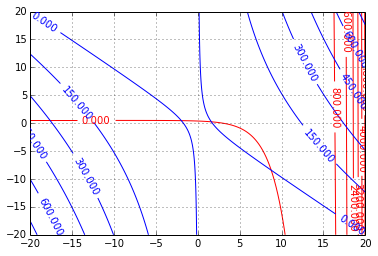

In [35]:
u = lambda x,y: math.exp((x-3.)/2.) + (2.*y) - 1.
v = lambda x,y: (x**2) + (x*y) - 3.

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

#####3.2) Find all solutions. Using Newton's method. Make sure you start close to these points. If it doesnt' converge to the point you want, try moving the initial guess.

Remember to plot to verify

(-1.976389517585015, 0.45847011287892564)
(1.611423195680697, 0.25028514266349605)
(8.7630421394772782, -8.4206952749694519)


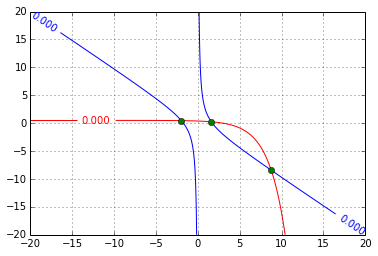

In [36]:
ux = lambda x,y: (math.exp((x-3.)/2.))/2.
uy = lambda x,y: 2.
vx = lambda x,y: (2.*x)+y
vy = lambda x,y: x

def uNewt(x,y,n):
    for i in range(n):
        A = np.array([
            [vx(x,y),vy(x,y)], 
            [ux(x,y),uy(x,y)]
        ])
        C = np.array([
            (-v(x,y))+(vx(x,y)*x)+(vy(x,y)*y),
            (-u(x,y))+(ux(x,y)*x)+(uy(x,y)*y)
        ])
        xn, yn = np.linalg.solve(A,C)
        x, y = xn, yn
    return x, y

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)

soln1 = uNewt(-2.,0.,10)
soln2 = uNewt(2.,0.,10)
soln3 = uNewt(8.,-8.,10)

print soln1
print soln2
print soln3

plt.plot(soln1[0],soln1[1],'o',color='green')
plt.plot(soln2[0],soln2[1],'o',color='green')
plt.plot(soln3[0],soln3[1],'o',color='green')

ucs = plt.contour(x, y, uz, [0], colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, [0], colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

####4) Solving System Nonlinear Equations.
Use Newton's method to solve this

$$x + y + z = 6$$
$$x^2 + y^2 + z^2 = 14$$
$$x^3 + y^3 + z^3 = 36$$
Use $x=1.0, y=0.0, z=-1.0$ as initial guess. (If you do it correctly your answer should be a permutation of 1,2,3)

In [37]:
u = lambda x,y,z: x+y+z-6.
v = lambda x,y,z: (x**2.)+(y**2.)+(z**2.)-14.
w = lambda x,y,z: (x**3.)+(y**3.)+(z**3.)-36.

ux = lambda x,y,z: 1.
uy = lambda x,y,z: 1.
uz = lambda x,y,z: 1.

vx = lambda x,y,z: 2.*x
vy = lambda x,y,z: 2.*y
vz = lambda x,y,z: 2.*z

wx = lambda x,y,z: 3.*(x**2)
wy = lambda x,y,z: 3.*(y**2)
wz = lambda x,y,z: 3.*(z**2)

def uNewt(x,y,z,n):
    for i in range(n):
        A = np.array([
            [ux(x,y,z),uy(x,y,z),uz(x,y,z)],
            [vx(x,y,z),vy(x,y,z),vz(x,y,z)],
            [wx(x,y,z),wy(x,y,z),wz(x,y,z)],
        ])
        C = np.array([
            (-u(x,y,z))+(ux(x,y,z)*x)+(uy(x,y,z)*y)+(uz(x,y,z)*z),
            (-v(x,y,z))+(vx(x,y,z)*x)+(vy(x,y,z)*y)+(vz(x,y,z)*z),
            (-w(x,y,z))+(wx(x,y,z)*x)+(wy(x,y,z)*y)+(wz(x,y,z)*z),
        ])
        xn, yn, zn = np.linalg.solve(A,C)
        x, y, z = xn, yn, zn
    return x, y, z

print uNewt(1.,0.,-1.,10)

(2.9999999999999973, 0.999999999999997, 2.0000000000000058)


####5) Iterative solution. Gauss-Siedel.

Gaussian elimination is actually quite expensive (It's $O(n^3)$). This method is actually what people use for large($n>10000$) problem.

The idea of the method is actually quite simple. Let us consider a 2 variables problem
$$ 5x + y = 6 \hspace{1in} \text{Equation A}$$
$$ x + 10y = 7 \hspace{1in} \text{Equation B}$$

The method works by first guess a solution. It doesn't have to be correct Let us guess
$$x_0 =1, y_0 =0$$

Then, $x_1$ can be found by plugging $y_0$ into Equation A and solve for $$x_1$$

$$ x_1 = \frac{6 - y_0}{5} = 1.2 $$

we can then use $x_1$ plug into Equation B and solve for $y_1$. (Notice that we don't use $x_0$ at all. There is a closely related method call Jacobi Method that does that)

$$ y_1 = \frac{7 - x_1}{6} = 0.58$$

We then repeat the process and find $x_2$ from $y_1$. Then $y_2$ from $x_2$.

$$ x_2 = \frac{6 - y_1}{5} = 1.084 $$
$$ y_2 = \frac{7 - x_2}{10} = 0.5916 $$

We can keep doing this. After 10 iterations, you will find that 

$$x_{10} = 1.08163265306, y_{10} = 0.591836734694$$
which is exactly our solution.

One can actually write this algorithm in matrix form(see wikipedia) but I won't ask you to do that. That's actually how it's implemented for generic set of equation.

This method converges really fast for special type of matrix called *diagonally dominant* matrix which means the diagonal element is bigger than the sum of the rest of the row. This actually happens a lot in real world applications. This method can also be extended to non-linear equations but usually Newton's method is faster. 

That being said, this method doesn't even guarantee convergence for other type of matrices. You may not get to the solutions.

#####5.1) Solve this using Gauss-Siedel. No need to write a generic solver. Do it for 10 iterations. (Anything after 6 or 7 iteration is essentially the same)

$$ 5x + y = 6$$
$$ x + 10y = 7$$

In [38]:
def gs(x,y,n):
    for i in range(n):
        x = (6.-y)/5.
        y = (7.-x)/10.
    return x,y
    
print gs(1.,0.,10)

(1.0816326530612246, 0.5918367346938775)


#####5.2) Solve this using Gauss-Siedel Method. Again, no need to write a generic solver.

$$ 5x + y + 2z = 1$$
$$ x + 10y +4z= 2$$
$$ x + 2y +7z= 3$$

Print out x,y,z for each iteration and stop when the guess doesn't change much any more.

Besure to check your answer against the given equation.

In [39]:
def gs2(x,y,z):
    n = 1
    while (True):
        px = x
        x = (1.-y-(2.*z))/5.
        if (abs(px-x)<(10**-9)):
            break
        y = (2.-x-(4.*z))/10.
        z = (3.-x-(2.*y))/7.
        
        print "x"+str(n)+" = "+str(x)
        print "y"+str(n)+" = "+str(y)
        print "z"+str(n)+" = "+str(z)
        print "=========="
        n+=1
    return x,y,z
    
x,y,z = gs2(1.,0.,1.)

print "===CHECK==="
print (5.*x)+y+(2.*z)
print x+(10.*y)+(4.*z)
print x+(2.*y)+(7.*z)

x1 = -0.2
y1 = -0.18
z1 = 0.508571428571
x2 = 0.0325714285714
y2 = -0.00668571428571
z2 = 0.425828571429
x3 = 0.0310057142857
y3 = 0.026568
z3 = 0.416551183673
x4 = 0.0280659265306
y4 = 0.0305729338776
z4 = 0.415826886531
x5 = 0.0275546586122
y5 = 0.0309137795265
z5 = 0.415802540334
x6 = 0.0274962279613
y6 = 0.0309293610705
z6 = 0.4158064357
x7 = 0.027491553506
y7 = 0.0309282703695
z7 = 0.415807415108
x8 = 0.027491379883
y8 = 0.0309278959686
z8 = 0.415807546883
x9 = 0.0274914020531
y9 = 0.0309278410415
z9 = 0.415807559409
x10 = 0.027491408028
y10 = 0.0309278354336
z10 = 0.415807560158
===CHECK===
1.0
2.00000000382
3.00000000082
